# First look at MOM6 output
A series of commands to quickly look at the output of a MOM6 simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cftime

/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/nbhome/gam/miniconda/envs/mom6/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
rootdir = '/archive/gam/MOM6/'
config = 'channel/4th-deg'
filename_prog = 'prog.nc'
filename_vgrid = 'Vertical_coordinate.nc'
filename_hgrid = 'ocean_geometry.nc'
filename_stats = 'ocean.stats.nc'

In [6]:
prog=xr.open_dataset(rootdir+config+'/'+filename_prog,decode_times=False)
print(prog)

<xarray.Dataset>
Dimensions:     (Time: 205, xh: 240, xq: 240, yh: 160, yq: 160, zl: 50)
Coordinates:
  * xq          (xq) float64 0.25 0.5 0.75 1.0 1.25 ... 59.25 59.5 59.75 60.0
  * yh          (yh) float64 -64.88 -64.62 -64.38 ... -25.62 -25.38 -25.12
  * zl          (zl) float64 0.5 2.674 7.309 ... 3.588e+03 3.75e+03 3.916e+03
  * Time        (Time) float64 7.0 14.0 21.0 ... 1.421e+03 1.428e+03 1.435e+03
  * xh          (xh) float64 0.125 0.375 0.625 0.875 ... 59.12 59.38 59.62 59.88
  * yq          (yq) float64 -64.75 -64.5 -64.25 -64.0 ... -25.5 -25.25 -25.0
Data variables:
    u           (Time, zl, yh, xq) float32 ...
    v           (Time, zl, yq, xh) float32 ...
    SSH         (Time, yh, xh) float32 ...
    heat_added  (Time, yh, xh) float32 ...
    temp        (Time, zl, yh, xh) float32 ...
    salt        (Time, zl, yh, xh) float32 ...
Attributes:
    filename:   prog.nc
    title:      channel_4th-deg
    grid_type:  regular
    grid_tile:  N/A


In [7]:
stats=xr.open_dataset(rootdir+config+'/'+filename_stats)
print(stats)

<xarray.Dataset>
Dimensions:        (Interface: 51, Layer: 50, Time: 1441)
Coordinates:
  * Layer          (Layer) float64 0.5 2.674 7.309 ... 3.75e+03 3.916e+03
  * Interface      (Interface) float64 0.0 1.0 4.347 ... 3.832e+03 4e+03
  * Time           (Time) timedelta64[ns] 0 days 1 days ... 1439 days 1440 days
Data variables:
    Ntrunc         (Time) float64 ...
    En             (Time) float64 ...
    APE            (Time, Interface) float64 ...
    KE             (Time, Layer) float64 ...
    H0             (Time, Interface) float64 ...
    Mass_lay       (Time, Layer) float64 ...
    Mass           (Time) float64 ...
    Mass_chg       (Time) float64 ...
    Mass_anom      (Time) float64 ...
    max_CFL_trans  (Time) float64 ...
    max_CFL_lin    (Time) float64 ...
    Salt           (Time) float64 ...
    Salt_chg       (Time) float64 ...
    Salt_anom      (Time) float64 ...
    Heat           (Time) float64 ...
    Heat_chg       (Time) float64 ...
    Heat_anom      (Time)

# Sections (x-y, y-z) at different moments in time

In [11]:
# Section (lat-depth, or lat-lon) of variable at start and end of simulation
def draw_var_times(var,clim,times,invert):
    nt = np.size(times)
    fig,ax = plt.subplots(figsize=(10,3*nt),nrows=np.size(times))
    for t in range(nt):
        im = ax[t].pcolormesh(var.isel(Time=times[t]),cmap="RdBu")
        im.set_clim(vmin=clim[0],vmax=clim[1])
        cbar = plt.colorbar(im,ax=ax[t])
        ax[t].set_title(times[t])
        if invert:
            ax[t].invert_yaxis()

In [28]:
get_times = [12,15,18,21,24]

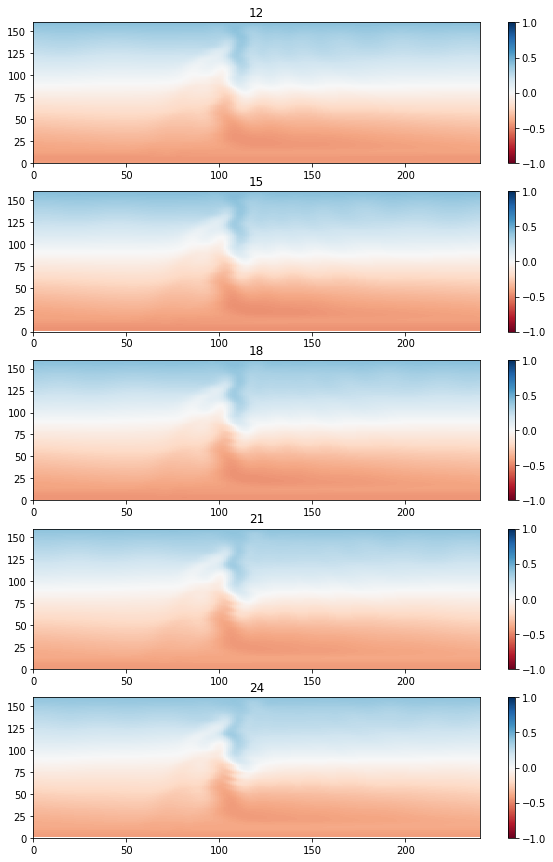

In [29]:
draw_var_times(var=prog.SSH,clim=[-1,1],times=get_times,invert=False)

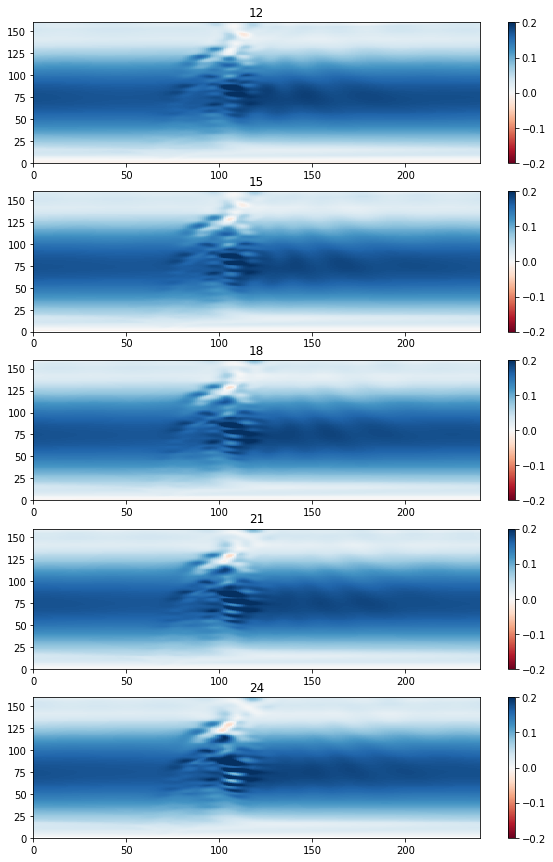

In [30]:
draw_var_times(var=prog.u.isel(zl=0),clim=[-0.2,0.2],times=get_times,invert=False)

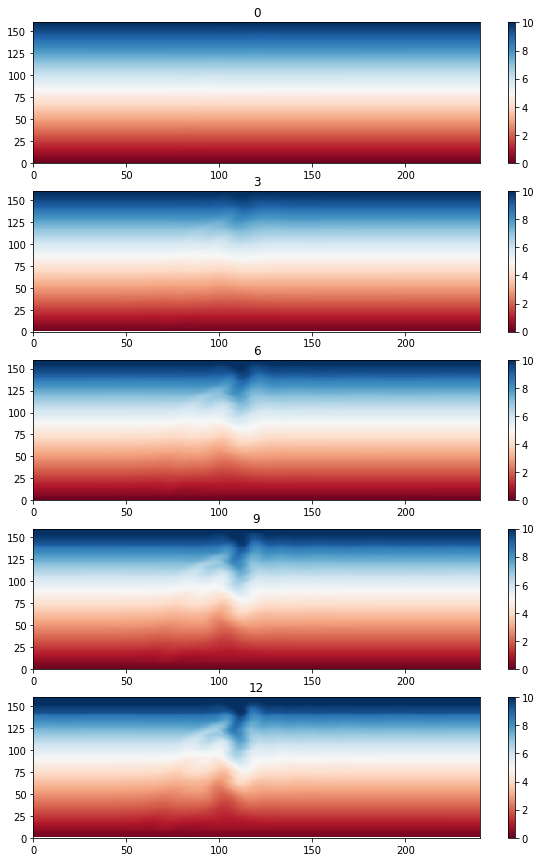

In [27]:
draw_var_times(var=prog.temp.isel(zl=0),clim=[-0,10],times=get_times,invert=False)

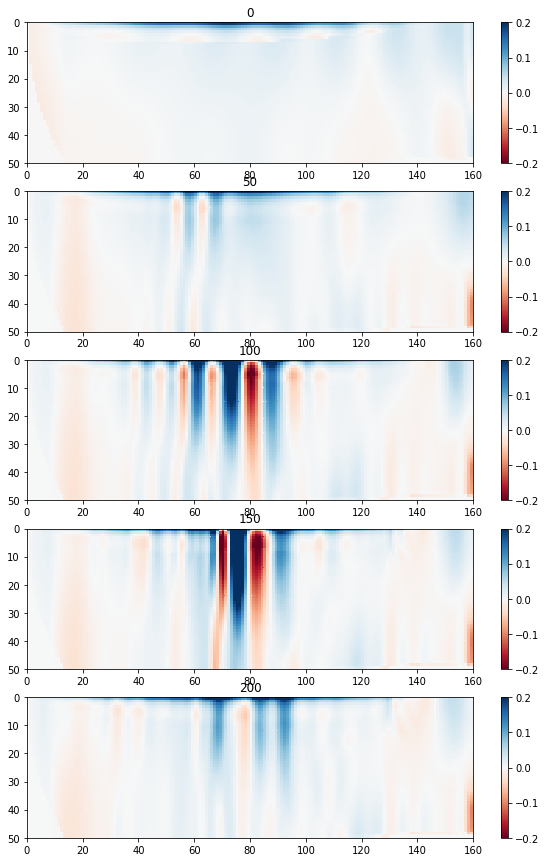

In [18]:
draw_var_times(var=prog.u.isel(xq=120),clim=[-0.2,0.2],times=get_times,invert=True)

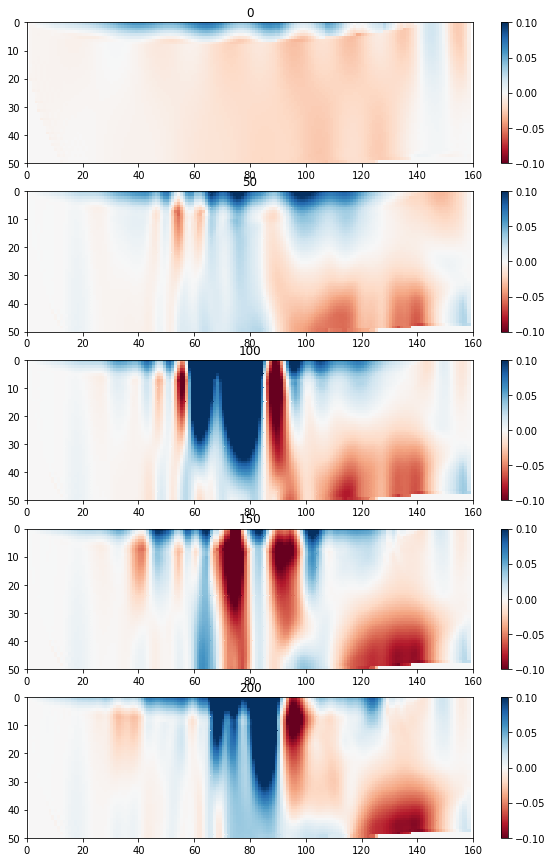

In [19]:
draw_var_times(var=prog.v.isel(xh=120),clim=[-0.1,0.1],times=get_times,invert=True)

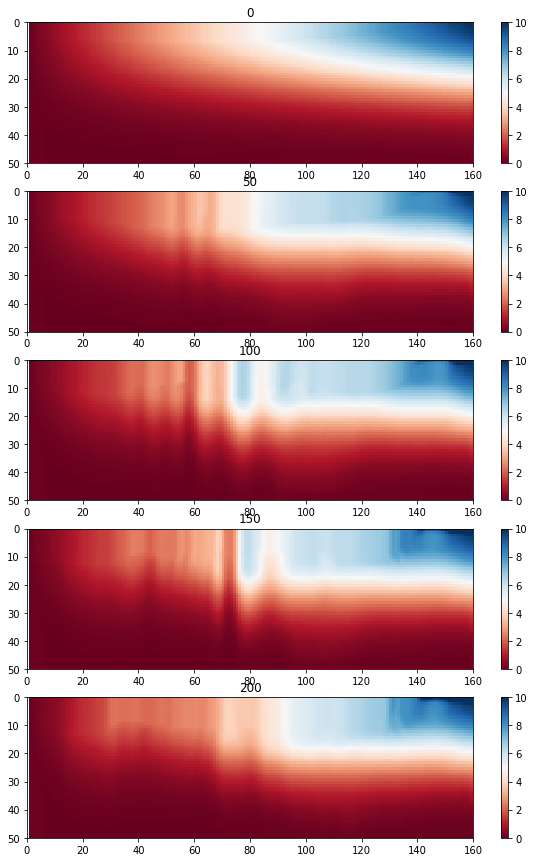

In [20]:
draw_var_times(var=prog.temp.isel(xh=120),clim=[0,10],times=get_times,invert=True)

# Depth slices at a single moment in time

In [22]:
# Section (lat-lon) of variable at different depths
def draw_var_depths(var,clim,depths):
    nk = np.size(depths)
    fig,ax = plt.subplots(figsize=(10,3*nk),nrows=np.size(depths))
    for d in range(nk):
        im = ax[d].pcolormesh(var.isel(zl=depths[d]),cmap="RdBu")
        im.set_clim(vmin=clim[0],vmax=clim[1])
        cbar = plt.colorbar(im,ax=ax[d])
        ax[d].set_title(depths[d])

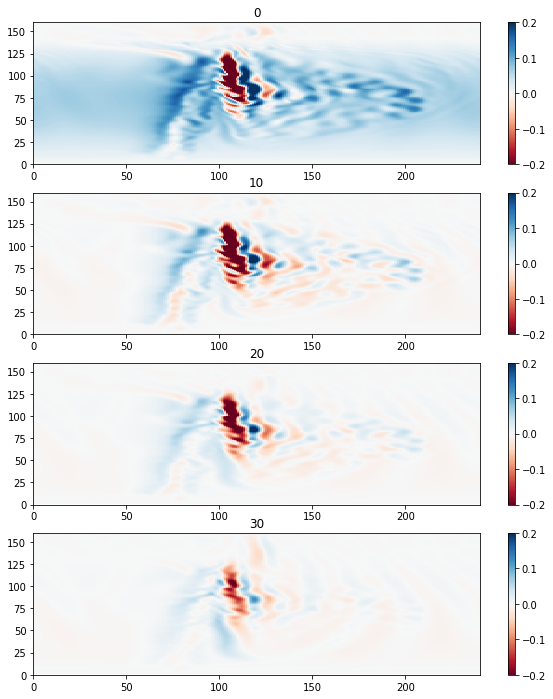

In [23]:
draw_var_depths(var=prog.v.isel(Time=200),clim=[-0.2,0.2],depths=[0, 10, 20, 30])

# Kinetic energy over time

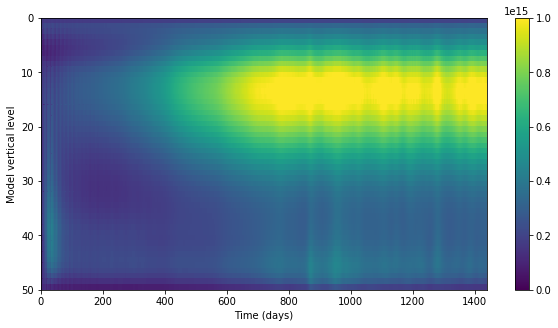

In [21]:
fig,ax = plt.subplots(figsize=(10,5),nrows=1)
im = ax.pcolormesh(stats.KE.transpose())
ax.invert_yaxis()
ax.set_xlabel('Time (days)')
ax.set_ylabel('Model vertical level')
im.set_clim([0,10E14])
cbar = plt.colorbar(im,ax=ax)